# Практична робота №4
### Студента групи МІТ-31
### Переверзева Олексія

Binary Classification

In [115]:
import pandas as pd
data = pd.read_csv('classification_dataset.csv')

In [116]:
data

,Feature1,Feature2,Target
0,-0.872929,0.013042,1
1,1.312935,2.770534,1
2,2.340428,2.420996,1
3,2.294548,-0.404380,1
4,0.944105,0.477241,1
...,...,...,...
195,-2.325239,-0.919512,0
196,-0.741314,1.970952,0
197,-0.581615,1.196672,0
198,0.871664,1.690409,1


In [117]:
X = data.drop('Target', axis=1)
y = data['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [118]:
X_test

,Feature1,Feature2
79,-0.728861,-1.221998
116,1.468963,1.601571
136,-1.951525,-0.374686
129,-0.582156,0.160414
124,1.765848,0.952813
190,0.241384,1.676681
145,-0.251304,0.736082
22,0.874819,0.488157
188,-0.912522,1.511426
53,0.694721,0.425433


In [119]:
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.linear_model import LogisticRegression as lr
model_lr = lr()

pg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Параметр регулярізації, контролює компроміс між 
                                         # досягненням плавної межі прийняття рішення та 
                                         # правильною класифікацією точок навчання 
    'max_iter': [100, 200, 300, 400]  # Максимальна к-ть ітерацій
}

# Створимо об'єкт GridSearchCV 
gs = gscv(estimator = model_lr, param_grid = pg, cv=5)
# Налаштуємо GridSearchCV на наші тренувальні дані
gs.fit(X_train, y_train)

# Отримаємо кращі параметри та кращу модель з Grid Search
best_params = gs.best_params_
best_model = gs.best_estimator_

# Зробимо передбачення на тестових даних, використовуючи кращу модель
y_pred = best_model.predict(X_test)

Оцінимо модель

Оцінка ефективності:
Кращі параметри: {'C': 0.001, 'max_iter': 100}
Accuracy: 0.88
Recall: 0.90
F1-Score: 0.88
AUC-ROC: 0.92

Матриця плутанини:


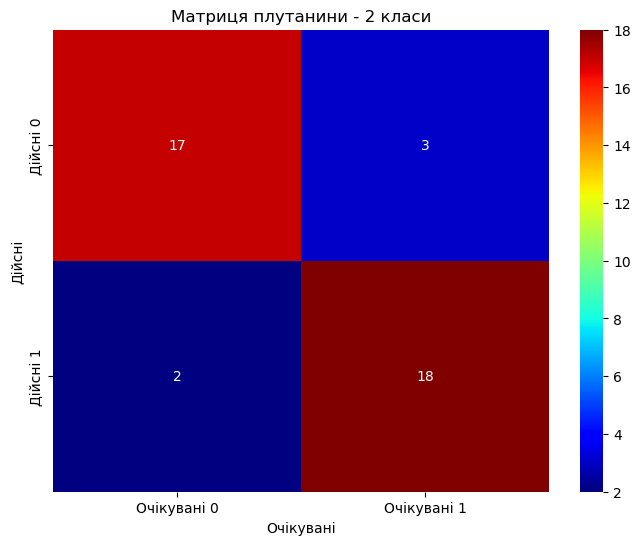

In [120]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_score

print("Оцінка ефективності:")
print("Кращі параметри:", best_params)
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred)))
print("AUC-ROC: {:.2f}".format(roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])))

print("\nМатриця плутанини:")
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='jet',
            xticklabels=['Очікувані 0', 'Очікувані 1'],
            yticklabels=['Дійсні 0', 'Дійсні 1'])
plt.xlabel('Очікувані')
plt.ylabel('Дійсні')
plt.title('Матриця плутанини - 2 класи')
plt.show()

Multiclass Classification

In [121]:
import pandas as pd
data = pd.read_csv('multiclass_dataset.csv')

In [122]:
data

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Target
0,-1.810057,-0.673058,0.086590,-0.155677,0.181484,1.025221,1
1,-1.902231,-0.843628,0.632782,2.270693,0.671189,1.190941,1
2,0.854693,0.706958,-0.524520,0.489375,-1.457497,-0.808198,2
3,-2.540925,-1.049519,-1.304470,0.669673,0.623820,1.526378,0
4,1.257316,0.035007,-0.858358,0.700310,1.398636,-0.351927,3
...,...,...,...,...,...,...,...
195,-0.430646,-0.390659,-0.444293,0.377300,0.855820,0.435911,1
196,0.459709,0.666906,-1.407512,-0.777817,-1.794455,-0.673442,2
197,-0.792734,0.060648,-0.238948,-0.907564,-1.173436,0.152996,0
198,-0.134888,-0.549884,-0.575638,0.122010,1.775143,0.492595,3


In [123]:
X = data.drop('Target', axis=1)
y = data['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [124]:
X_test

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
79,-2.227106,-0.503633,-0.763259,-1.804882,-0.920627,0.991179
116,1.632909,0.552375,-0.240325,-0.374821,0.029500,-0.879234
136,0.040911,0.835469,1.848956,1.126565,-2.895644,-0.706318
129,-0.060801,-0.402822,0.394452,-0.420984,1.346412,0.351096
124,0.280920,0.209437,-0.335785,1.669022,-0.398232,-0.246544
190,0.462056,-0.472658,-0.066080,-1.211016,2.225539,0.275034
145,-2.461648,-0.793546,1.551152,0.115675,-0.182557,1.292841
22,1.480362,0.345144,0.114228,0.150302,0.575358,-0.667482
188,2.793738,0.287603,0.222134,-0.478749,2.368101,-0.956723
53,3.971278,2.069709,1.882024,1.345420,-2.488649,-2.743229


In [125]:
# Зробимо універсальну функцію для кожної моделі

def gscv_ev_m(model, pg, X_test, y_test):
    gs = gscv(estimator=model, param_grid=pg, cv=5)
    gs.fit(X_train, y_train)
    best_params = gs.best_params_
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("Оцінка ефективності:")
    print("Кращі параметри:", best_params)
    print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {:.2f}".format(precision_score(y_test, y_pred, average='weighted')))
    print("Recall: {:.2f}".format(recall_score(y_test, y_pred, average='weighted')))
    print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred, average='weighted')))

    print("\nМатриця плутанини:")
    plt.figure(figsize=(8, 6))
    sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='jet',
            xticklabels=['Очікувані 0', 'Очікувані 1', 'Очікувані 2', 'Очікувані 3'],
            yticklabels=['Дійсні 0', 'Дійсні 1', 'Дійсні 2', 'Дійсні 3'])
    plt.xlabel('Очікувані')
    plt.ylabel('Дійсні')
    plt.title('Матриця плутанини - 4 класи')
    plt.show()

RandomForestClassifier

Оцінка ефективності:
Кращі параметри: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.70
Precision: 0.79
Recall: 0.70
F1-Score: 0.69

Матриця плутанини:


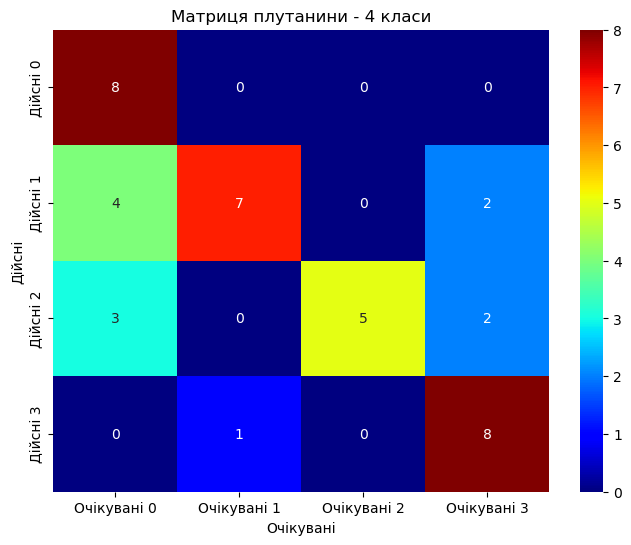

In [126]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state=55)

pg_rfc = {
    'max_depth': [10, 20, 30], # Максимальна глибина дерев
    'min_samples_split': [2, 5, 10], # Мінімальна кількість зразків, необхідних для розбиття внутрішнього вузла
    'min_samples_leaf': [1, 2, 4], # Мінімальна кількість зразків, які повинен мати листовий вузол
    'n_estimators': [50, 100, 150] # Кількість дерев
}

gscv_ev_m(model_rfc, pg_rfc, X_test, y_test)


Support Vector Classification

Оцінка ефективності:
Кращі параметри: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.75
Precision: 0.80
Recall: 0.75
F1-Score: 0.74

Матриця плутанини:


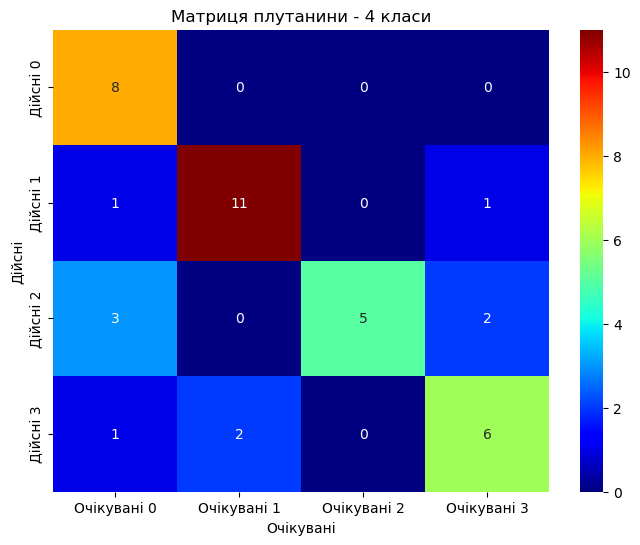

In [127]:
from sklearn.svm import SVC
model_svc = SVC()

pg_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'], # Функція ядра, яка використовується в алгоритмі SVM
    'degree': [2, 3, 4], # Ступінь поліноміального ядра
    'gamma': ['scale', 'auto', 0.1, 1] # Наскільки далеко поширюється вплив одного навчального прикладу
}

gscv_ev_m(model_svc, pg_svc, X_test, y_test)

LogisticRegression

Оцінка ефективності:
Кращі параметри: {'C': 100, 'max_iter': 100}
Accuracy: 0.62
Precision: 0.70
Recall: 0.62
F1-Score: 0.63

Матриця плутанини:


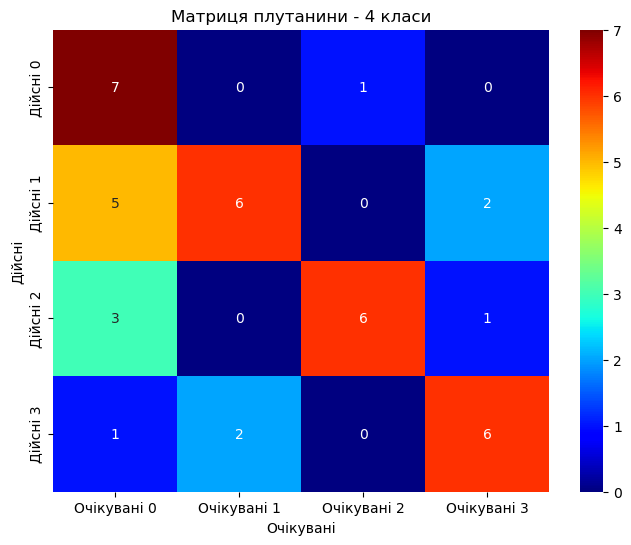

In [128]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

pg_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400]
}

gscv_ev_m(model_lr, pg_lr, X_test, y_test)

Multilabel Classification

In [129]:
import pandas as pd
data = pd.read_csv('multilabel_dataset.csv')

In [130]:
data

,Feature1,Feature2,Feature3,Label1,Label2,Label3,Label4
0,8.0,17.0,16.0,0,1,1,0
1,11.0,17.0,15.0,1,0,0,1
2,25.0,15.0,20.0,0,0,1,1
3,7.0,17.0,29.0,1,1,1,0
4,15.0,27.0,22.0,0,1,1,1
...,...,...,...,...,...,...,...
195,10.0,30.0,17.0,0,1,0,0
196,19.0,23.0,18.0,1,0,0,1
197,27.0,28.0,5.0,0,0,0,1
198,13.0,12.0,25.0,0,1,1,0


In [131]:
X = data[['Feature1', 'Feature2', 'Feature3']]
y = data[['Label1', 'Label2', 'Label3', 'Label4']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [132]:
X_test

,Feature1,Feature2,Feature3
179,9.0,22.0,11.0
155,19.0,40.0,6.0
23,18.0,27.0,8.0
159,14.0,20.0,15.0
96,19.0,16.0,20.0
198,13.0,12.0,25.0
42,20.0,18.0,10.0
110,8.0,29.0,8.0
128,15.0,10.0,23.0
97,12.0,13.0,25.0


In [133]:
pg_ml = {
    'estimator__max_depth': [10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__n_estimators': [50, 100, 150]
}

from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

model = MultiOutputClassifier(RandomForestClassifier(random_state=55))
gs_ml = gscv(estimator=model, param_grid=pg_ml, cv=5)
gs_ml.fit(X_train, y_train)

best_params = gs_ml.best_params_
best_model = gs_ml.best_estimator_

y_pred = best_model.predict(X_test)

Оцінка ефективності:
Кращі параметри: {'estimator__max_depth': 10, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
Accuracy: 0.40
Precision: 0.60; 0.73; 0.84; 0.61; 
Recall:  0.38; 0.80; 0.76; 0.50; 
F1-Score:  0.46; 0.76; 0.80; 0.55; 

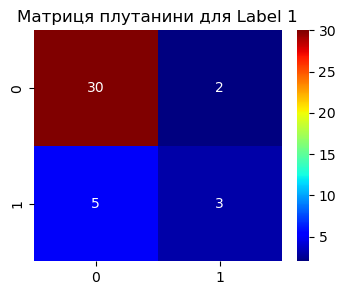

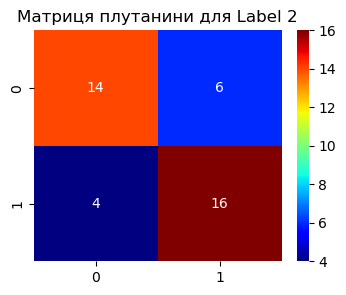

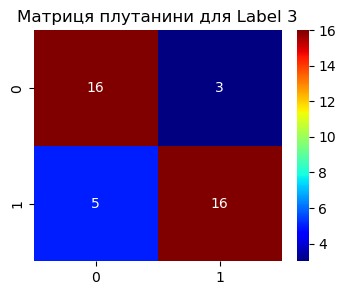

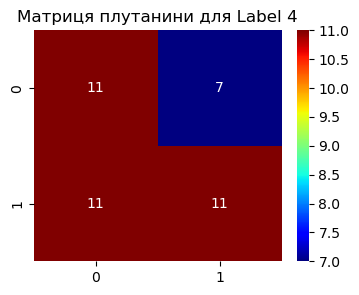

In [134]:
print("Оцінка ефективності:")
print("Кращі параметри:", best_params)
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

print("Precision:", end=' ')
for i in (precision_score(y_test, y_pred, average=None)):
    print("{:.2f};".format(i), end=' ')

print("\nRecall: ", end=' ')
for i in (recall_score(y_test, y_pred, average=None)):
    print("{:.2f};".format(i), end=' ')

print("\nF1-Score: ", end=' ')
for i in (f1_score(y_test, y_pred, average=None)):
    print("{:.2f};".format(i), end=' ')

from sklearn.metrics import multilabel_confusion_matrix
for i, cmx in enumerate(multilabel_confusion_matrix(y_test, y_pred), start=1):
    plt.figure(figsize=(4, 3))
    sb.heatmap(cmx, annot=True, fmt='d', cmap='jet')
    plt.title(f'Матриця плутанини для Label {i}')